# Strategy Analysis

This is a Jupyter Notebook analyzing the performance of the a trading strategy, comparing simulated versus live trading results.
The trading strategy attempts to frontrun rebalancing flows using cross-sectional dispersion and correlations between stock index to index components.
This notebook is in 3 parts: 
 
1. Return Distribution Analysis
   - Histograms comparing simulated vs live trading returns
   - Statistical measures (mean, median) for both periods
   - Probability density visualization

2. Benchmark Correlation
   - Scatter plots of strategy vs NQ returns
   - Regression analysis with R² values
   - Separate analysis for simulated and live periods

3. Monthly Performance
   - Bar chart comparison of Bread(20vol) vs NQ
   - Monthly point gains/losses
   - Performance metrics for Q3 2024

## Data Sources
- Daily performance data from our performance csv
- Simulated period: Q2 2022 to Q2 2024
- Live period: Q3 2024 

## Libraries used:
- Visualization using matplotlib, seaborn, and pandas
- Statistical analysis using scipy

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import numpy as np
from matplotlib.ticker import FuncFormatter, PercentFormatter
from scipy.stats import linregress


In [16]:

# Define font properties
font_path = 'public/transporth.ttf'
font_path2 = 'public/transportm.ttf'
font_path3 = 'public/Gotham-Bold.otf'
font_path4 = 'public/Gotham-Medium.otf'

propTitle = font_manager.FontProperties(fname=font_path, size=15)
prop = font_manager.FontProperties(fname=font_path)
prop_light = font_manager.FontProperties(fname=font_path2)
prop_axis = font_manager.FontProperties(fname=font_path3)
prop_axis2 = font_manager.FontProperties(fname=font_path4)


In [17]:
df = pd.read_csv('daily performance.csv')

df['date'] = pd.to_datetime(df['date'])

# Convert columns to numeric, coerce errors to NaN
df['daily_return_strategy'] = pd.to_numeric(df['daily_return_strategy'], errors='coerce')

# Remove rows with values: NaN, inf, -inf, or zero 
df = df[np.isfinite(df['daily_return_strategy'])]
df = df[df['daily_return_strategy'] != 0]# Data Cleanup

# Split the data into before and after 2024-06-01
cutoff_date = pd.to_datetime('2024-06-01')
df_before = df[df['date'] < cutoff_date]
df_after = df[df['date'] >= cutoff_date]

mean_before = df_before['daily_return_strategy'].mean()
mean_after = df_after['daily_return_strategy'].mean()

median_before = df_before['daily_log_return_strategy'].median()
median_after = df_after['daily_log_return_strategy'].median()


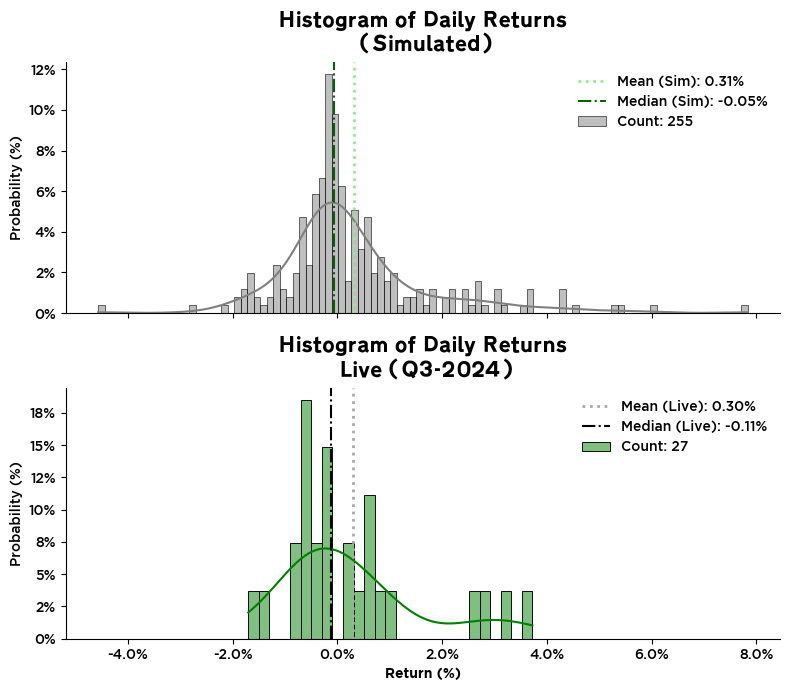

Simulated Data: n=255, Mean=0.0031
Live Data: n=27, Mean=0.0030


In [18]:
# Histogram of Returns Comparison Live / Simulated
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

def format_pct(x, pos):
    return f'{x:.1%}'

sns.histplot(data=df_before['daily_return_strategy'], label=f'Count: {len(df_before)}', color='gray', kde=True, 
             stat="probability", alpha=0.5, ax=ax1, bins = 100)
ax1.axvline(mean_before, color='lightgreen', linestyle=':', linewidth=2, 
            label=f'Mean (Sim): {mean_before:.2%}')
ax1.axvline(median_before, color='darkgreen', linestyle='-.', label=f'Median (Sim): {median_before:.2%}')
ax1.set_title('Histogram of Daily Returns\n (Simulated)', fontproperties=propTitle)
ax1.set_ylabel('Probability (%)', fontproperties=prop_axis2)
ax1.legend(loc='upper right', prop=prop_axis2, frameon=False)
ax1.xaxis.set_major_formatter(FuncFormatter(format_pct))
ax1.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))

ax1.tick_params(axis='both', which='major', labelsize=3)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(prop_axis2)

sns.histplot(data=df_after['daily_return_strategy'], label=f'Count: {len(df_after)}', color='green', kde=True, 
             stat="probability", alpha=0.5, ax=ax2, bins=27)
ax2.axvline(mean_after, color='darkgray', linestyle=':', linewidth=2, 
            label=f'Mean (Live): {mean_after:.2%}')

ax2.axvline(median_after, color='black', linestyle='-.', label=f'Median (Live): {median_after:.2%}')
ax2.set_title('Histogram of Daily Returns\n Live (Q3-2024)', fontproperties=propTitle)
ax2.set_xlabel('Return (%)', fontproperties=prop_axis)
ax2.set_ylabel('Probability (%)', fontproperties=prop_axis2)
ax2.legend(loc='upper right', frameon=False, prop=prop_axis2)
ax2.xaxis.set_major_formatter(FuncFormatter(format_pct))
ax2.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))

ax2.tick_params(axis='both', which='major', labelsize=3)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(prop_axis2)
    
# Remove top and right spines
sns.despine()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print additional statistics
print(f"Simulated Data: n={len(df_before)}, Mean={mean_before:.4f}")
print(f"Live Data: n={len(df_after)}, Mean={mean_after:.4f}")

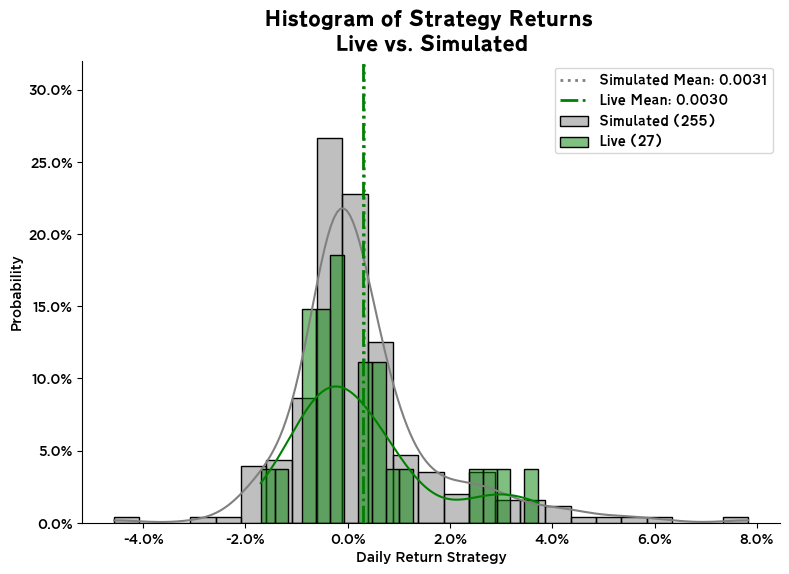

In [11]:
# Create the plot
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the histogram for simulated data
sns.histplot(data=df_before['daily_return_strategy'], color='gray', label=f'Simulated ({len(df_before)})', 
             kde=True, stat="probability", alpha=0.5, bins=25, ax=ax)

# Plot the histogram for live data
sns.histplot(data=df_after['daily_return_strategy'], color='green', label=f'Live ({len(df_after)})', 
             kde=True, stat="probability", alpha=0.5, bins=20, ax=ax)

# Add vertical lines for means with different linestyles
ax.axvline(mean_before, color='gray', linestyle=':', linewidth=2, label=f'Simulated Mean: {mean_before:.4f}')
ax.axvline(mean_after, color='green', linestyle='-.', linewidth=2, label=f'Live Mean: {mean_after:.4f}')


ax.set_title('Histogram of Strategy Returns \nLive vs. Simulated', fontproperties=propTitle)
ax.set_xlabel('Daily Return Strategy', fontproperties=prop_axis2)
ax.set_ylabel('Probability', fontproperties=prop_axis2)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.1%}'))
ax.yaxis.set_major_formatter(PercentFormatter(1))  # Note the change here

ax.legend(prop=prop_light, loc='upper right')

# Set y-axis range from 0 to the upper bounds (visual reason)
ax.set_ylim(bottom=0, top=0.32)  # Adjust top=0.32 if data changes

ax2.tick_params(axis='both', which='major', labelsize=3)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(prop_axis2)

# Remove top and right spines
sns.despine()

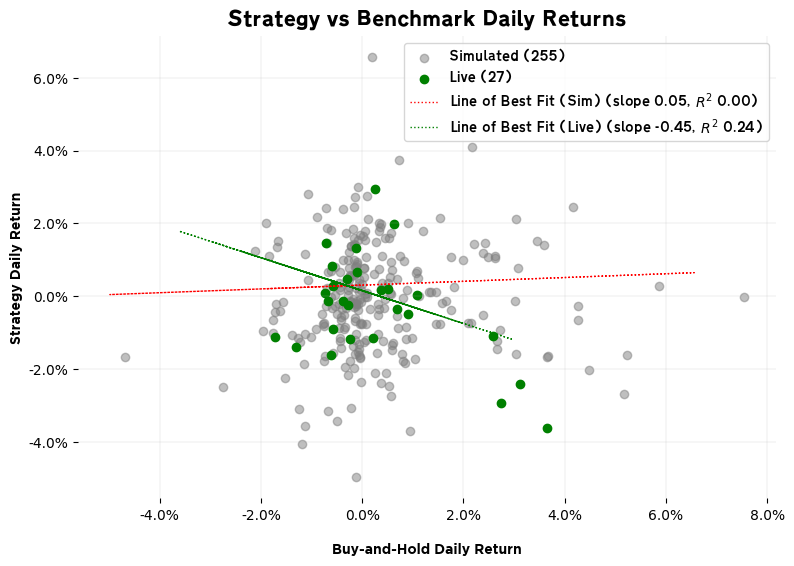

In [12]:
# Cell 5: Correlation Plots
fig, ax = plt.subplots(figsize=(9, 6))

# Plot sim data in grey
ax.scatter(df_before['daily_log_return_strategy'], df_before['daily_return_buy_hold_nq'],
           color='grey', alpha=0.5, label = f'Simulated ({len(df_before)})')

# Plot live data in green
ax.scatter(df_after['daily_log_return_strategy'], df_after['daily_return_buy_hold_nq'], 
           color='green', alpha=1, label=f'Live ({len(df_after)})')

ax.set_xlabel('Buy-and-Hold Daily Return', fontproperties=prop_axis, labelpad=15)
ax.set_ylabel('Strategy Daily Return', fontproperties=prop_axis)
ax.set_title('Strategy vs Benchmark Daily Returns', fontproperties=propTitle, size=15)

# Calculate and plot line of best fit for data for historical sampling
slope_before, intercept_before, r_value_before, _, _ = linregress(df_before['daily_return_buy_hold_nq'], df_before['daily_log_return_strategy'])
line_before = slope_before * df_before['daily_return_buy_hold_nq'] + intercept_before
ax.plot(df_before['daily_return_buy_hold_nq'], line_before, color='red', linestyle=':',
        label=f'Line of Best Fit (Sim) (slope {slope_before:.2f}, $R^2$ {r_value_before**2:.2f})', linewidth=1)

# Calculate and plot line of best fit prior for 'live' trading
slope_after, intercept_after, r_value_after, _, _ = linregress(df_after['daily_return_buy_hold_nq'], df_after['daily_log_return_strategy'])
line_after = slope_after * df_after['daily_return_buy_hold_nq'] + intercept_after
ax.plot(df_after['daily_return_buy_hold_nq'], line_after, color='green', linestyle=':',
        label=f'Line of Best Fit (Live) (slope {slope_after:.2f}, $R^2$ {r_value_after**2:.2f})', linewidth=1)

# Add legend
ax.legend(prop=prop_light, loc='best', title_fontproperties=prop)

# Format axis ticks as percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.1%}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:.1%}'))

# Add grid
ax.grid(True, linewidth=.15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



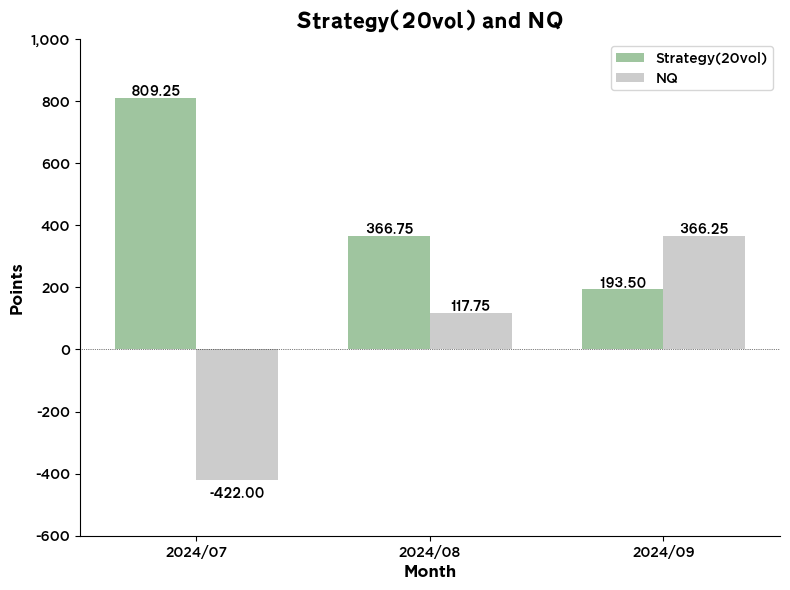

In [14]:
# Cell 6: Benchmark Comparison

# Data
data = {
    'Month': ['2024/07', '2024/08', '2024/09'],
    'Strategy(20vol)': [809.25, 366.75, 193.5],
    'NQ': [-422, 117.75, 366.25]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(df, id_vars=['Month'], var_name='Category', value_name='Value')

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the seaborn bar plot
ax = sns.barplot(x='Month', y='Value', hue='Category', data=df_melted, palette=['green', 'grey'], alpha = 0.4, width = 0.7)

# Add labels and title
plt.xlabel('Month', fontproperties=prop_axis, fontsize=12)
plt.ylabel('Points', fontproperties=prop_axis, fontsize=12)
plt.title('Strategy(20vol) and NQ', fontproperties=propTitle)

# Format y-axis labels
def format_func(value, tick_number):
    return f'{value:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
ax.set_ylim(bottom=-600, top=1000)

# Apply custom fonts to tick labels
plt.xticks(fontproperties=prop_axis2)
plt.yticks(fontproperties=prop_axis2)

# Customize the legend
plt.legend(prop=prop_axis2, title=None)

for i, patch in enumerate(ax.patches):
    value = patch.get_height()
    text_x = patch.get_x() + patch.get_width() / 2
    
    if value > 0:
        text_y = value
        va = 'bottom'
        value_text = f'{value:,.2f}'
    elif value < 0:
        text_y = value - 20  # Adjust position for negative values
        va = 'top'
        value_text = f'{value:,.2f}'
    else:  # value == 0
        value_text = None
        
    
    
    ax.text(text_x, text_y, value_text, ha='center', va=va, fontproperties=prop_light)

ax.axhline(y=0, color='black', linestyle=':', linewidth=0.5)


plt.tight_layout()
sns.despine() 
plt.show()